In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import sys
import os

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 2500)
pd.set_option('display.max_columns', 100)

In [9]:
# Reading in the data
df_final = pd.read_csv('~/Desktop/cs209a-FinalProject/Harvard_G1/data/Merged_Fundamentals_and_Polls/merged_df_final.csv')
df_final = df_final.drop(['Unnamed: 0', 'President_winning', 'Date', 'Year', 'Name', 'Winner', 'popular_votes', 'El_winner'], axis = 1)
display(df_final.head())

,NAP06,NAP07,NAP08,NAP09,NAP10,Current_President_Seeking_Reelection,Early_Stopping_Previous,2nd_Mandate_Prev_Pres,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9,Democrat_Republican,popular_vote_percentage
0,0.48,0.52,0.60,0.65,0.68,0.0,0.0,0.0,2238.932,2068.901,2055.103,2086.017,2120.450,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,45.000,NaN,38.0,37.0,36.5,39.5,1,49.55
1,0.48,0.52,0.60,0.65,0.68,0.0,0.0,0.0,2238.932,2068.901,2055.103,2086.017,2120.450,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,50.000,NaN,49.0,48.0,48.5,46.5,0,45.07
2,0.33,0.34,0.32,0.31,0.30,0.0,0.0,1.0,2102.251,2383.291,2513.690,2540.550,2546.022,2564.401,2648.621,42942,46706,48006,48924,49320,49597,0.8,9.2,3.4,3.5,0.1288,0.1763,0.1437,0.0842,50.667,49.5,59.0,50.0,NaN,55.0,0,55.18
3,0.33,0.34,0.32,0.31,0.30,0.0,0.0,1.0,2102.251,2383.291,2513.690,2540.550,2546.022,2564.401,2648.621,42942,46706,48006,48924,49320,49597,0.8,9.2,3.4,3.5,0.1288,0.1763,0.1437,0.0842,39.333,39.5,31.0,43.0,NaN,40.5,1,44.33
4,0.68,0.70,0.72,0.74,0.76,1.0,0.0,0.0,2662.482,2735.091,2914.993,2903.671,2927.665,2925.035,2973.179,50240,48942,51429,52631,52604,52777,4.8,1.4,6.7,4.8,-0.0377,0.4396,0.2077,0.0227,51.000,59.0,62.0,61.0,52.0,52.0,0,57.37


In [10]:
display(df_final.describe())

,NAP06,NAP07,NAP08,NAP09,NAP10,Current_President_Seeking_Reelection,Early_Stopping_Previous,2nd_Mandate_Prev_Pres,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9,Democrat_Republican,popular_vote_percentage
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,36.000000,38.000000,38.000000,36.000000,38.000000,38.000000,38.000000
mean,0.476316,0.494211,0.496316,0.508421,0.513158,0.578947,0.052632,0.315789,8393.428526,8608.174684,8870.478632,8919.543526,8896.277632,9001.719842,8987.985053,91971.315789,93500.368421,95101.473684,95955.000000,96120.000000,95250.789474,2.589474,3.263158,2.857895,3.768421,0.077884,0.052779,0.154474,0.044121,44.875674,46.022017,43.971017,44.355577,44.391720,44.741576,0.500000,47.888947
std,0.106756,0.121180,0.121709,0.119289,0.127303,0.500355,0.226294,0.471069,5228.840970,5378.938206,5488.196844,5457.749853,5321.617596,5441.611022,5333.556355,35406.349112,35508.577755,35671.671823,34779.708983,34791.291476,33688.733471,2.028418,2.386496,2.104902,1.745435,0.167451,0.182105,0.109601,0.128840,7.393428,6.905157,10.015712,7.514228,7.730693,7.627277,0.506712,5.931859
min,0.320000,0.300000,0.290000,0.310000,0.270000,0.000000,0.000000,0.000000,2102.251000,2068.901000,2055.103000,2086.017000,2120.450000,2132.598000,2134.981000,38600.000000,43093.000000,44411.000000,45178.000000,45294.000000,45245.000000,-1.300000,-1.100000,-4.100000,0.700000,-0.172700,-0.275700,-0.022300,-0.338400,29.000000,33.385331,19.000000,28.500000,29.000000,28.153888,0.000000,37.450000
25%,0.397500,0.402500,0.382500,0.407500,0.417500,0.000000,0.000000,0.000000,3654.534000,3814.064500,3982.847000,4066.022750,4117.144000,4172.040500,4185.946000,56321.250000,58244.250000,59518.500000,61046.750000,61298.250000,61275.000000,1.625000,2.000000,2.225000,2.750000,-0.086975,-0.075125,0.056750,-0.033150,41.110080,41.584805,39.006240,41.004892,40.291699,39.795630,0.000000,43.647500
50%,0.480000,0.510000,0.500000,0.520000,0.530000,1.000000,0.000000,0.000000,6902.105000,6802.497000,7339.893000,7483.371000,7612.668000,7686.059000,7749.151000,91380.000000,88907.000000,91520.000000,95032.000000,95344.000000,95629.000000,2.900000,3.600000,3.300000,3.500000,0.128800,0.048200,0.164000,0.042700,45.439953,45.990625,44.240800,43.617280,45.493182,45.168537,0.500000,48.100000
75%,0.527500,0.580000,0.597500,0.590000,0.580000,1.000000,0.000000,1.000000,12889.492500,13241.024000,13828.632000,13896.905000,14037.352750,14143.342750,14272.533500,128516.000000,129707.250000,130384.750000,132156.750000,132288.000000,129987.750000,3.475000,4.575000,4.100000,4.800000,0.244700,0.172950,0.219475,0.142825,49.448651,49.566256,48.045203,47.934388,48.123622,48.311509,1.000000,50.745000
max,0.690000,0.700000,0.720000,0.740000,0.760000,1.000000,1.000000,1.000000,18359.432000,18813.923000,19253.959000,19010.848000,17668.203000,18583.984000,17876.179000,147196.000000,149549.000000,151553.000000,144647.000000,144916.000000,145061.000000,6.200000,9.200000,6.700000,7.100000,0.276600,0.439600,0.383200,0.260100,64.000000,64.000000,76.500000,61.000000,65.000000,63.500000,1.000000,61.050000


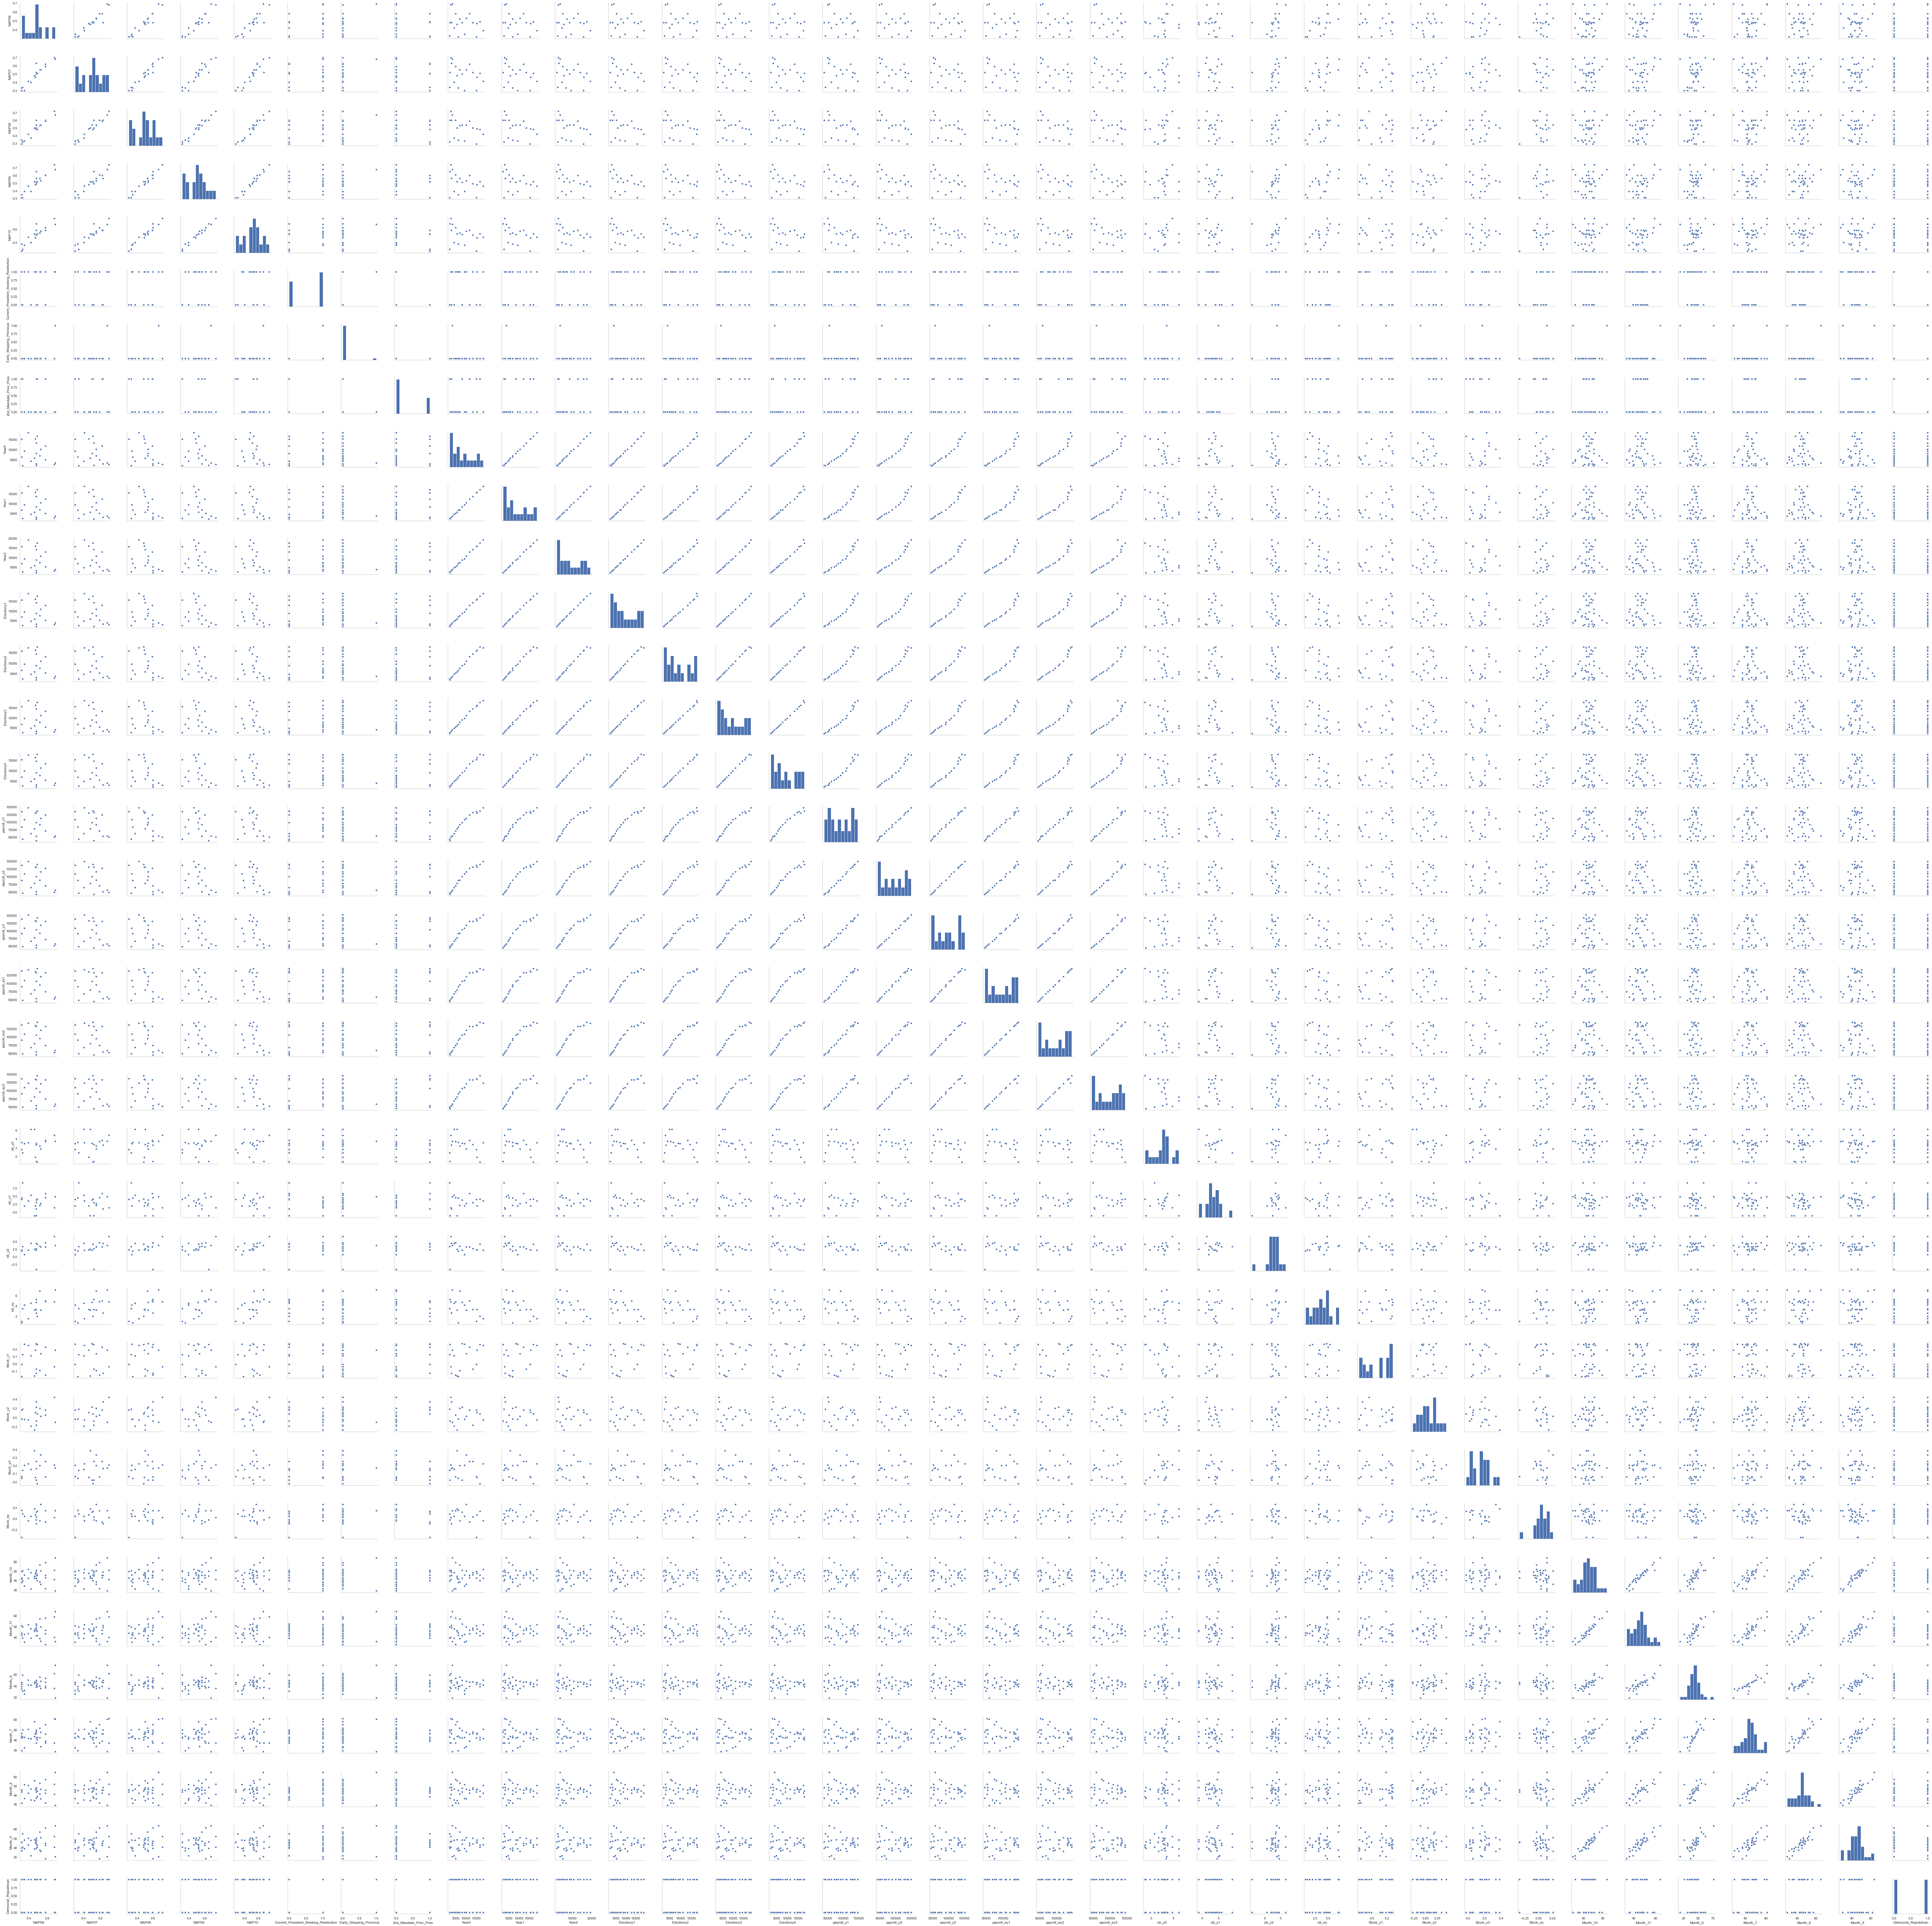

In [11]:
# Making a features pair-plot to investigate correlations between features
df_pair_plot = df_final.drop(['popular_vote_percentage'], axis = 1)

sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(df_pair_plot)

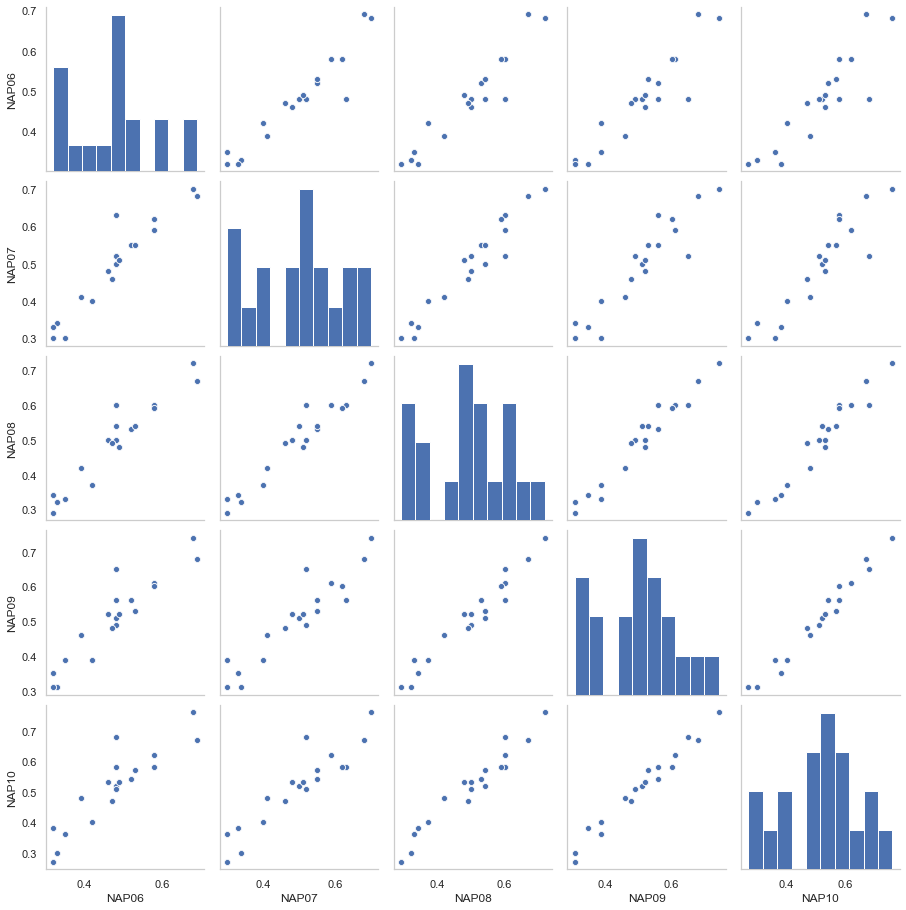

In [56]:
df_pair_plot = df_final[['NAP06', 'NAP07', 'NAP08', 'NAP09', 'NAP10']]

sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(df_pair_plot)

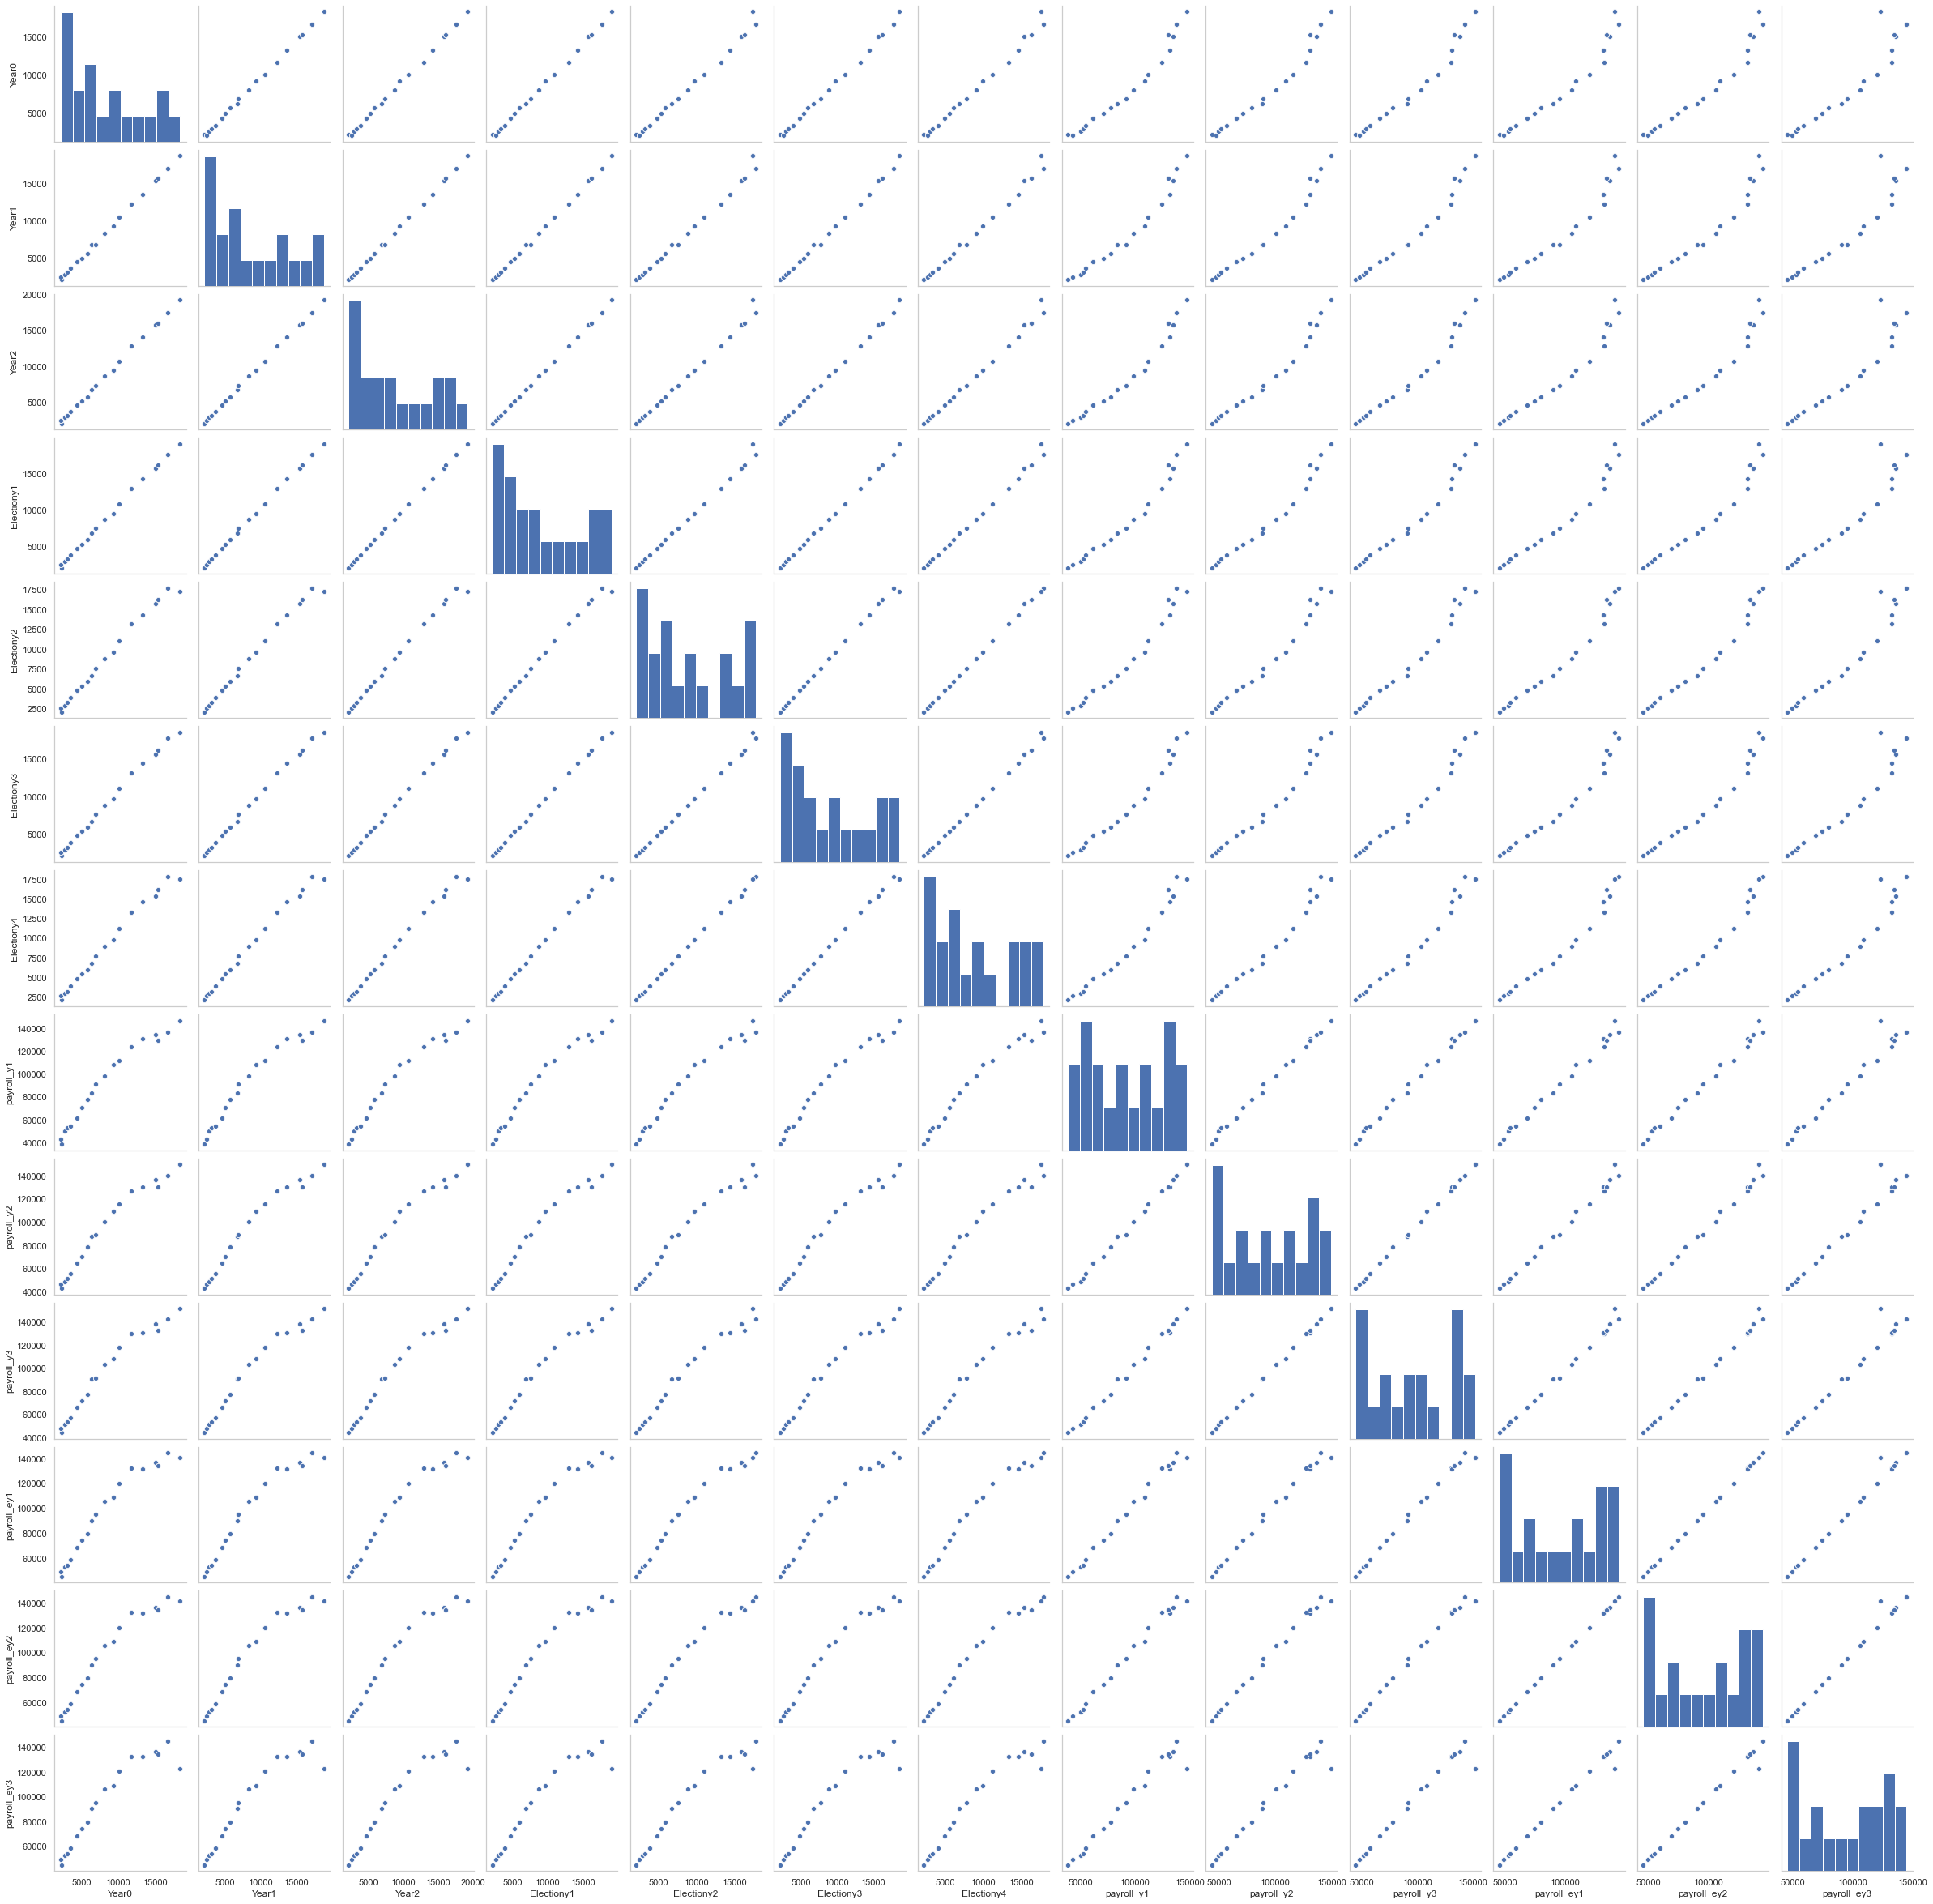

In [57]:
df_pair_plot = df_final[['Year0', 'Year1', 'Year2', 'Electiony1', 'Electiony2', 'Electiony3', 'Electiony4', 'payroll_y1', 'payroll_y2', 'payroll_y3', 'payroll_ey1', 'payroll_ey2', 'payroll_ey3']]

sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(df_pair_plot)

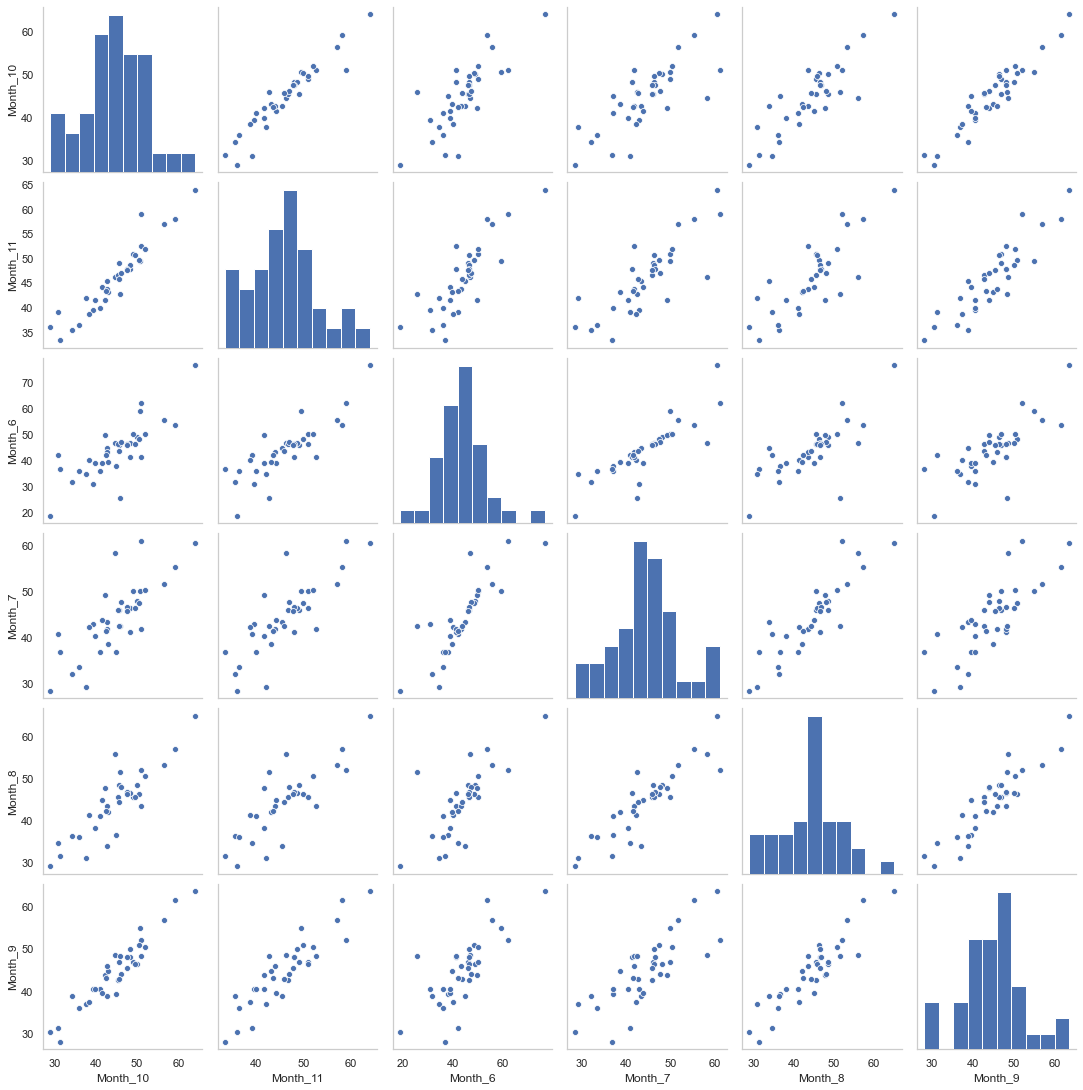

In [59]:
df_pair_plot = df_final[['Month_10', 'Month_11', 'Month_6', 'Month_7', 'Month_8', 'Month_9']]

sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(df_pair_plot)

In [53]:
# Feature correlation matrix
df_pair_plot1 = df_final.drop(['popular_vote_percentage', 'Current_President_Seeking_Reelection', 'Early_Stopping_Previous', '2nd_Mandate_Prev_Pres', 'Democrat_Republican'], axis = 1)

correlation_df1 = pd.DataFrame(df_pair_plot1.corr())
display(correlation_df1)

,NAP06,NAP07,NAP08,NAP09,NAP10,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9
NAP06,1.000000,0.948884,0.935385,0.928245,0.897780,-0.257791,-0.259517,-0.248627,-0.245606,-0.232375,-0.235008,-0.226518,-0.246635,-0.268726,-0.258610,-0.235166,-0.234603,-0.217294,0.178793,-0.167309,0.401008,0.668885,-0.008936,0.218297,0.192124,0.267905,0.129143,0.201410,0.230979,0.174134,0.133439,0.087113
NAP07,0.948884,1.000000,0.970844,0.932697,0.922413,-0.293886,-0.295118,-0.282954,-0.280632,-0.271553,-0.272195,-0.265953,-0.288239,-0.312618,-0.300368,-0.280740,-0.280204,-0.268035,0.131910,-0.234024,0.387251,0.567225,-0.109769,0.311272,0.201726,0.190268,0.164018,0.241410,0.273956,0.217734,0.145630,0.102176
NAP08,0.935385,0.970844,1.000000,0.977275,0.972035,-0.329383,-0.333700,-0.324107,-0.322392,-0.316203,-0.315351,-0.310567,-0.331088,-0.353257,-0.342474,-0.326283,-0.325704,-0.317091,0.088514,-0.364490,0.223456,0.591796,-0.052194,0.282717,0.141236,0.218438,0.178029,0.240381,0.255141,0.213746,0.146909,0.097751
NAP09,0.928245,0.932697,0.977275,1.000000,0.986677,-0.301897,-0.309096,-0.300677,-0.299330,-0.296367,-0.293137,-0.290535,-0.312274,-0.332903,-0.323964,-0.311830,-0.311218,-0.309010,0.076330,-0.418124,0.149560,0.620745,0.004391,0.212573,0.136635,0.193506,0.158726,0.213120,0.214761,0.180646,0.133642,0.074385
NAP10,0.897780,0.922413,0.972035,0.986677,1.000000,-0.316525,-0.322696,-0.315442,-0.314604,-0.315610,-0.309907,-0.308041,-0.331803,-0.349253,-0.339686,-0.330865,-0.329960,-0.332380,0.076329,-0.441565,0.132841,0.548060,-0.022916,0.172442,0.139189,0.267628,0.146244,0.205995,0.212566,0.169687,0.105383,0.050791
Year0,-0.257791,-0.293886,-0.329383,-0.301897,-0.316525,1.000000,0.999554,0.999258,0.999180,0.995375,0.998188,0.995033,0.976236,0.977695,0.977574,0.966797,0.967076,0.940079,-0.314456,0.059177,-0.045251,-0.504642,0.326624,-0.099612,-0.050675,-0.222925,0.028228,-0.038823,-0.049906,-0.067814,0.019573,0.022344
Year1,-0.259517,-0.295118,-0.333700,-0.309096,-0.322696,0.999554,1.000000,0.999690,0.999524,0.995823,0.998462,0.995477,0.975782,0.978142,0.978555,0.967732,0.968019,0.941322,-0.314217,0.080401,-0.035593,-0.512602,0.331008,-0.092739,-0.053737,-0.218858,0.024719,-0.040688,-0.051009,-0.073174,0.014974,0.019880
Year2,-0.248627,-0.282954,-0.324107,-0.300677,-0.315442,0.999258,0.999690,1.000000,0.999885,0.996469,0.999093,0.996303,0.977942,0.979623,0.980263,0.969999,0.970318,0.943897,-0.308269,0.085506,-0.026888,-0.500563,0.326616,-0.086543,-0.046527,-0.221863,0.028192,-0.036709,-0.045546,-0.068315,0.019158,0.023371
Electiony1,-0.245606,-0.280632,-0.322392,-0.299330,-0.314604,0.999180,0.999524,0.999885,1.000000,0.997426,0.999568,0.997370,0.979177,0.980630,0.981179,0.971950,0.972261,0.947239,-0.309851,0.083308,-0.025521,-0.495862,0.325546,-0.088964,-0.045927,-0.215691,0.027010,-0.038464,-0.046870,-0.068982,0.018840,0.022525
Electiony2,-0.232375,-0.271553,-0.316203,-0.296367,-0.315610,0.995375,0.995823,0.996469,0.997426,1.000000,0.998846,0.999625,0.982327,0.983359,0.983863,0.979961,0.980034,0.963445,-0.321711,0.083877,-0.019506,-0.479214,0.320415,-0.080277,-0.053366,-0.210790,0.022988,-0.044777,-0.051511,-0.074237,0.015325,0.019483


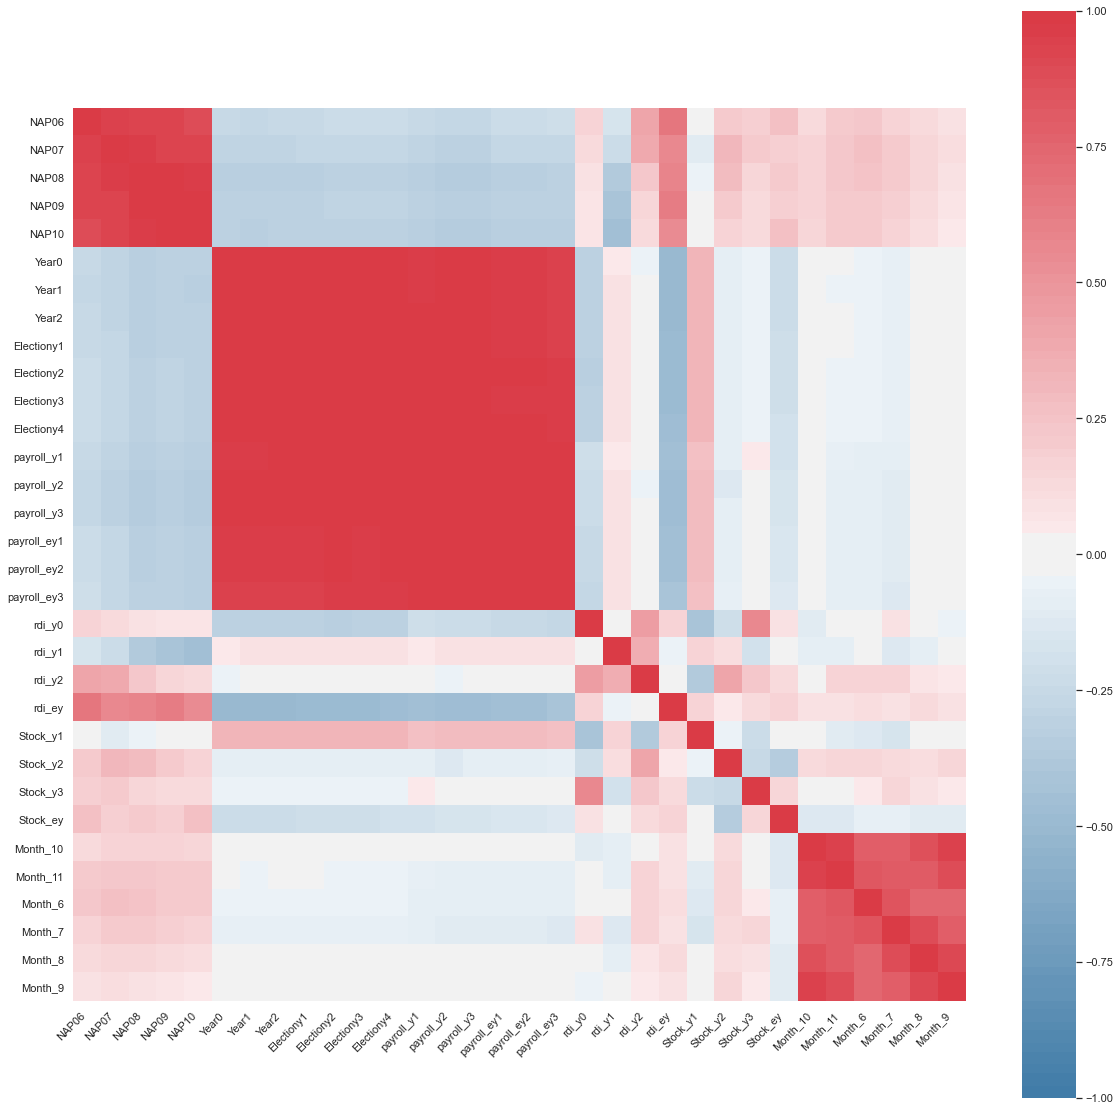

In [77]:
fig, ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(
    correlation_df1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

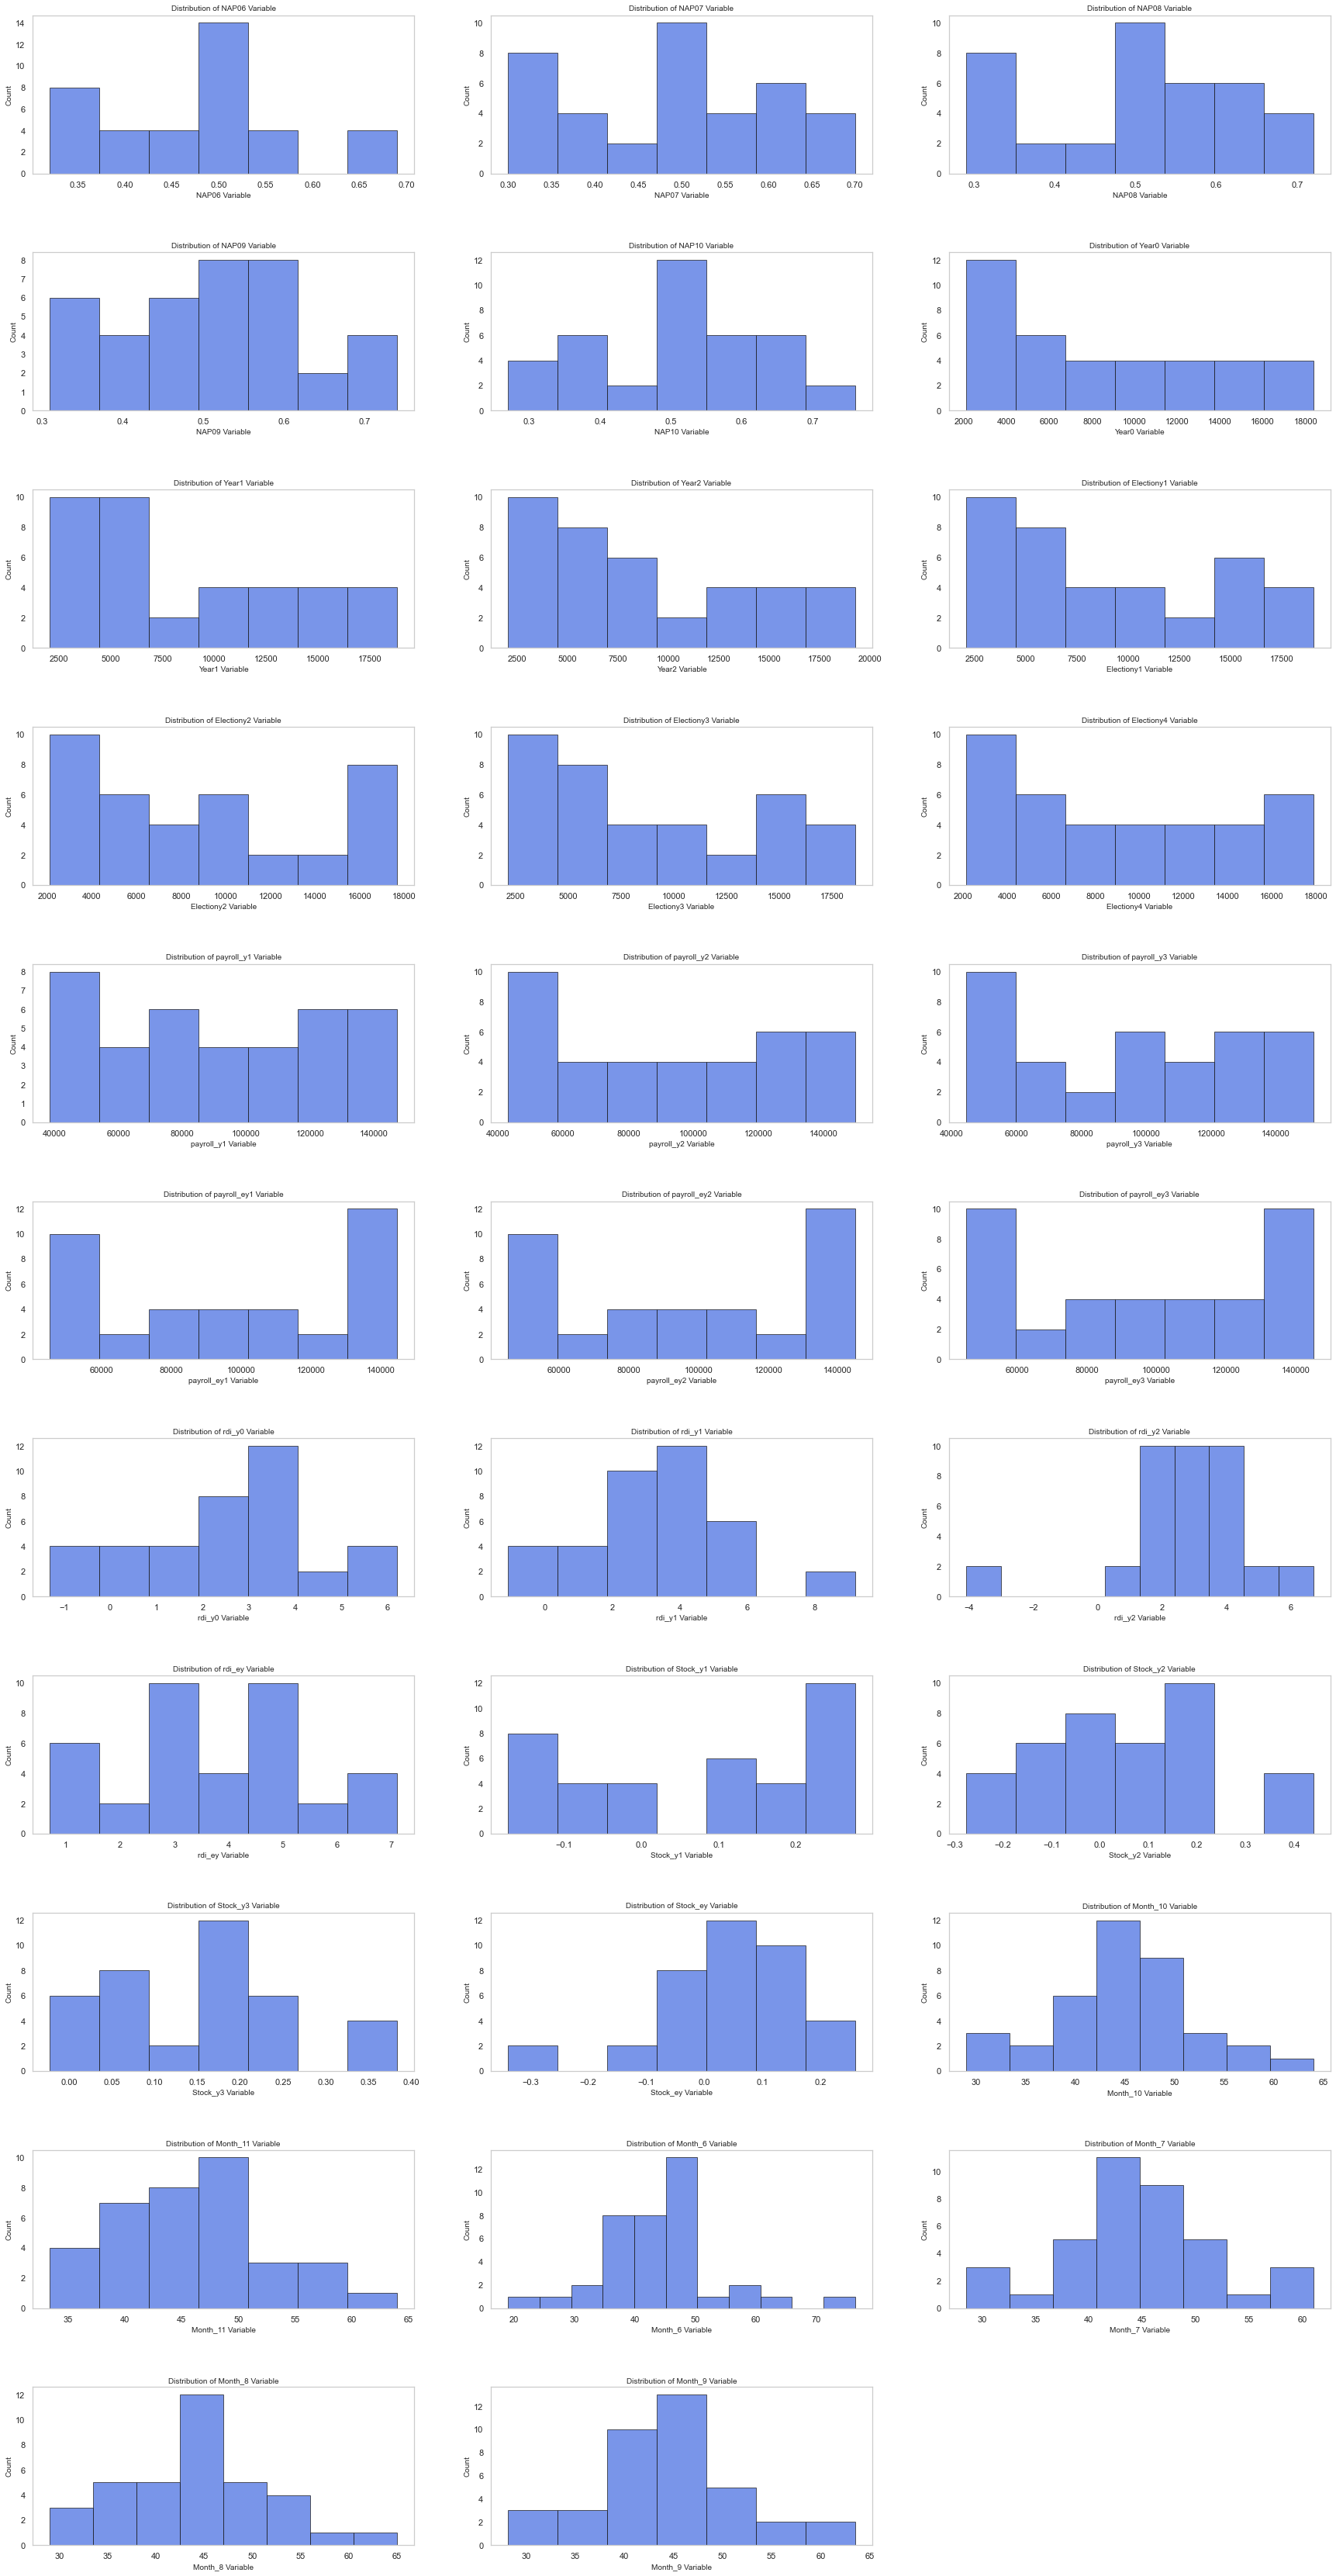

In [23]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(30, 60), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
fontsize = 10

variables = df_pair_plot1.columns.values.tolist()
#['NAP', 'payroll', 'stock', 'rdi', 'election', 'national_polls', 'gdp', 'state_election', 'popular_vote_percentage']

# Plot histograms
for i, variable in enumerate(variables):
    axs[i].hist(df_pair_plot1[variable], alpha=0.7, color='royalblue', bins='auto', density=False, histtype = 'bar', edgecolor='k')
    axs[i].set_title("Distribution of " + variable + " Variable", fontsize=fontsize)
    axs[i].set_xlabel(variable + " Variable", fontsize=fontsize)
    axs[i].set_ylabel('Count', fontsize=fontsize)
    
axs[32].set_axis_off()

In [78]:
df_pair_plot1.loc[(df_pair_plot1['rdi_y2']<=-3)]

,NAP06,NAP07,NAP08,NAP09,NAP10,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9
0,0.48,0.52,0.6,0.65,0.68,2238.932,2068.901,2055.103,2086.017,2120.45,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,45.0,NaN,38.0,37.0,36.5,39.5
1,0.48,0.52,0.6,0.65,0.68,2238.932,2068.901,2055.103,2086.017,2120.45,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,50.0,NaN,49.0,48.0,48.5,46.5


In [27]:
# Splitting into training and testing sets
X = df_final.drop(['popular_vote_percentage'], axis=1)
Y = df_final['popular_vote_percentage']
X_train = X.drop([36,37]).values
y_train = Y.drop([36,37]).values
X_test = X.iloc[[36,37]].values
y_test = Y.iloc[[36,37]].values

In [33]:
# Standardizing the features
X_1 = df_final.drop(['popular_vote_percentage', 'Current_President_Seeking_Reelection', 'Early_Stopping_Previous', '2nd_Mandate_Prev_Pres', 'Democrat_Republican'], axis=1)
X_1.at[2, 'Month_8'] = 52.5
X_1.at[3, 'Month_8'] = 41.75
X_1.at[0, 'Month_11'] = 48
X_1.at[1, 'Month_11'] = 52
scaler = StandardScaler()
scaler.fit(X_1)
x_2 = scaler.transform(X_1)
X_2 = pd.DataFrame(x_2, columns = df_pair_plot1.columns.values.tolist())
X_2['Democrat_Republican'] = df_final['Democrat_Republican']
X_2['Current_President_Seeking_Reelection'] = df_final['Current_President_Seeking_Reelection']
X_2['Early_Stopping_Previous'] = df_final['Early_Stopping_Previous']
X_2['2nd_Mandate_Prev_Pres'] = df_final['2nd_Mandate_Prev_Pres']
X_train1 = X_2.drop([36,37]).values
X_test1 = X_2.iloc[[36,37]].values
display(X_2)

,NAP06,NAP07,NAP08,NAP09,NAP10,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9,Democrat_Republican,Current_President_Seeking_Reelection,Early_Stopping_Previous,2nd_Mandate_Prev_Pres
0,0.034974,0.215677,0.863338,1.202788,1.328186,-1.192829,-1.232037,-1.258494,-1.268885,-1.290356,-1.279277,-1.302132,-1.527628,-1.438639,-1.440104,-1.479558,-1.480493,-1.504273,-1.843308,-1.852811,-3.349939,0.889256,1.141517,-0.746713,-1.222144,-0.514585,0.017042,0.263895,-0.604168,-0.992027,-1.064913,-0.696439,1,0.0,0.0,0.0
1,0.034974,0.215677,0.863338,1.202788,1.328186,-1.192829,-1.232037,-1.258494,-1.268885,-1.290356,-1.279277,-1.302132,-1.527628,-1.438639,-1.440104,-1.479558,-1.480493,-1.504273,-1.843308,-1.852811,-3.349939,0.889256,1.141517,-0.746713,-1.222144,-0.514585,0.702396,0.860734,0.508849,0.491513,0.525384,0.233639,0,0.0,0.0,0.0
2,-1.388959,-1.289661,-1.468113,-1.685692,-1.696894,-1.219319,-1.172804,-1.173813,-1.184485,-1.209312,-1.198860,-1.204536,-1.403349,-1.335523,-1.337971,-1.370406,-1.363221,-1.373356,-0.894044,2.521075,0.261001,-0.155849,0.308146,0.687401,-0.099619,0.315251,0.793822,0.487709,1.520683,0.761248,1.055483,1.363019,0,0.0,0.0,1.0
3,-1.388959,-1.289661,-1.468113,-1.685692,-1.696894,-1.219319,-1.172804,-1.173813,-1.184485,-1.209312,-1.198860,-1.204536,-1.403349,-1.335523,-1.337971,-1.370406,-1.363221,-1.373356,-0.894044,2.521075,0.261001,-0.155849,0.308146,0.687401,-0.099619,0.315251,-0.759739,-1.004388,-1.312451,-0.182823,-0.369158,-0.563571,1,0.0,0.0,1.0
4,1.933550,1.721015,1.862531,1.967386,1.965045,-1.110739,-1.106523,-1.099711,-1.117059,-1.136634,-1.131697,-1.142867,-1.194461,-1.271707,-1.240724,-1.262390,-1.267562,-1.277695,1.104407,-0.791188,1.849815,0.598949,-0.699524,2.152680,0.492157,-0.168493,0.839467,1.905203,1.824233,2.244788,0.989221,0.964415,0,1.0,0.0,0.0
5,1.933550,1.721015,1.862531,1.967386,1.965045,-1.110739,-1.106523,-1.099711,-1.117059,-1.136634,-1.131697,-1.142867,-1.194461,-1.271707,-1.240724,-1.262390,-1.267562,-1.277695,1.104407,-0.791188,1.849815,0.598949,-0.699524,2.152680,0.492157,-0.168493,-0.531242,-0.929784,-0.806534,-0.992027,-0.468551,-0.563571,1,1.0,0.0,0.0
6,0.034974,1.135606,0.863338,0.438190,0.532113,-1.048477,-1.044727,-1.046389,-1.047968,-1.073710,-1.066702,-1.093687,-1.122246,-1.199129,-1.185922,-1.214574,-1.220287,-1.236633,0.005259,-0.961048,0.742460,-0.678401,-1.244211,1.596175,0.088085,-1.081706,0.565325,0.711524,0.610033,0.761248,0.127810,0.300073,1,0.0,0.0,1.0
7,0.034974,1.135606,0.863338,0.438190,0.532113,-1.048477,-1.044727,-1.046389,-1.047968,-1.073710,-1.066702,-1.093687,-1.122246,-1.199129,-1.185922,-1.214574,-1.220287,-1.236633,0.005259,-0.961048,0.742460,-0.678401,-1.244211,1.596175,0.088085,-1.081706,0.085577,0.413105,0.205299,0.221779,0.525384,0.300073,0,0.0,0.0,1.0
8,2.028479,1.553755,1.446200,1.457654,1.248579,-0.960292,-0.946051,-0.941489,-0.941086,-0.952744,-0.940044,-0.954158,-1.071899,-1.069099,-1.074414,-1.087910,-1.084081,-1.096722,0.454910,0.695084,0.453585,1.934360,0.660982,-0.895300,0.143564,0.798994,2.621388,2.651252,3.291392,2.177354,2.712043,2.492400,1,1.0,1.0,0.0
9,2.028479,1.553755,1.446200,1.457654,1.248579,-0.960292,-0.946051,-0.941489,-0.941086,-0.952744,-0.940044,-0.954158,-1.071899,-1.069099,-1.074414,-1.087910,-1.084081,-1.096722,0.454910,0.695084,0.453585,1.934360,0.660982,-0.895300,0.143564,0.798994,-2.176092,-1.526623,-2.526651,-2.138398,-2.058848,-1.892254,0,1.0,1.0,0.0


In [34]:
X_2_y = X_2.copy()
X_2_y['popular_vote_percentage'] = df_final['popular_vote_percentage']
X_2_y = X_2_y.drop([36,37])

In [35]:
# Function to generate bootstrapped DataFrames
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

In [47]:
# Bootstrapped LassoCV
n_bootstraps = 100
coefs = []
intercepts = []
for n in range(n_bootstraps):
    df_new = bootstrap(X_2_y)
    #display(df_new)
    X_train_bootstrap = df_new.drop(['popular_vote_percentage'], axis = 1).values
    y_train_bootstrap = df_new['popular_vote_percentage'].values
    lassoCV = LassoCV(fit_intercept = True, cv = 5).fit(X_train_bootstrap, y_train_bootstrap)
    coefs.append(lassoCV.coef_)
    intercepts.append(lassoCV.intercept_)

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08904138417003793, tolerance: 0.06253511857142856
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13582242987408577, tolerance: 0.06253511857142856
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0890680289721506, tolerance: 0.06253511857142856
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24725369993780433, tolerance: 0.12592360678571426
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3450707178422281, tolerance: 0.12592360678571426
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3451368219426012, tolerance: 0.12592360678571426
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyth

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12363477318618976, tolerance: 0.11761136689655173
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14218295231029643, tolerance: 0.11761136689655173
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13465225517453172, tolerance: 0.12235002137931034
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12498244139527159, tolerance: 0.0956027875862069
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13381682090100355, tolerance: 0.09933531862068964
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12844970115033583, tolerance: 0.09933531862068964
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08782106850372884, tolerance: 0.07126562107142857
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28033844713558054, tolerance: 0.07126562107142857
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3535495125513002, tolerance: 0.07126562107142857
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1705599113964098, tolerance: 0.0850340524137931
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2581399591267015, tolerance: 0.0850340524137931
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3363793517204279, tolerance: 0.0850340524137931
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0821143719149946, tolerance: 0.06291376678571428
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09228445127371554, tolerance: 0.06291376678571428
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09208696403460337, tolerance: 0.06291376678571428
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24068789473593988, tolerance: 0.06909649310344827
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4592853608621166, tolerance: 0.06909649310344827
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.291108358645225, tolerance: 0.06909649310344827
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pytho

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1865720978029639, tolerance: 0.11383289448275864
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18294483942989714, tolerance: 0.11383289448275864
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17135985737829706, tolerance: 0.11383289448275864
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3162865520701992, tolerance: 0.0797770744827586
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.36148668048767973, tolerance: 0.0797770744827586
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15704103599096442, tolerance: 0.0797770744827586
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08229583448818123, tolerance: 0.07463463241379308
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08759648372168516, tolerance: 0.07463463241379308
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09255625076141527, tolerance: 0.07463463241379308
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.107715072876708, tolerance: 0.08282121172413792
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17361153732464718, tolerance: 0.1223825303448276
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1334991593727093, tolerance: 0.1223825303448276
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2566205935303465, tolerance: 0.10851270206896553
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33606522365971614, tolerance: 0.10851270206896553
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.36568891261001113, tolerance: 0.10851270206896553
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11176559169019296, tolerance: 0.1021428731034483
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12977643517172233, tolerance: 0.1021428731034483
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1465776547384703, tolerance: 0.1021428731034483
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15386576924991857, tolerance: 0.05379025310344828
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34135912192044415, tolerance: 0.05379025310344828
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39477753540288063, tolerance: 0.05379025310344828
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4500129685517784, tolerance: 0.08859073448275863
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44163171645757515, tolerance: 0.08859073448275863
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38171010276772854, tolerance: 0.08859073448275863
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1414980033925204, tolerance: 0.09979785999999997
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30388307101232215, tolerance: 0.10190874827586208
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12443120828348953, tolerance: 0.10190874827586208
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21058435590447466, tolerance: 0.09314179862068964
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32729301410365963, tolerance: 0.09314179862068964
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3150799742208328, tolerance: 0.09314179862068964
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11059060191659675, tolerance: 0.08862110206896553
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2048251989264207, tolerance: 0.08862110206896553
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3687854755333504, tolerance: 0.08862110206896553
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyth

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1649050754663861, tolerance: 0.12516100137931033
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25535760396258933, tolerance: 0.12516100137931033
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18892164835883918, tolerance: 0.12516100137931033
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05658389911372197, tolerance: 0.056473866896551726
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08731215429671124, tolerance: 0.056473866896551726
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07449789873441759, tolerance: 0.056473866896551726
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08327907487206421, tolerance: 0.07278656551724139
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08002810226623236, tolerance: 0.07278656551724139
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07627121839675377, tolerance: 0.07278656551724139
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1719776839987599, tolerance: 0.09606474206896551
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23153367162778693, tolerance: 0.09606474206896551
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12902979031896322, tolerance: 0.09606474206896551
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11848475862730723, tolerance: 0.08570469793103451
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09686308086914508, tolerance: 0.08570469793103451
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13749341976072582, tolerance: 0.08570469793103451
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10754607734137345, tolerance: 0.07103204827586208
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29246053148544426, tolerance: 0.07103204827586208
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07545589185410151, tolerance: 0.06184123448275862
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.222515522580367, tolerance: 0.09451760827586209
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1589538859961821, tolerance: 0.0852598282758621
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18091543962651757, tolerance: 0.0852598282758621
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22804198400573839, tolerance: 0.0872898455172414
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3945958520128343, tolerance: 0.0872898455172414
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3880423223346732, tolerance: 0.0872898455172414
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2893382071401511, tolerance: 0.13484810689655177
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16348118913561294, tolerance: 0.10723289172413798
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17480778722181256, tolerance: 0.10723289172413798
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09835650708633281, tolerance: 0.0914557668965517
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.41328829937250333, tolerance: 0.0914557668965517
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5188924305794913, tolerance: 0.0914557668965517
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1822078284719026, tolerance: 0.13977131250000002
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16734915301086062, tolerance: 0.1609774903448276
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.708731805266595, tolerance: 0.1609774903448276
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27378222910779026, tolerance: 0.11453747241379308
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43091619814529114, tolerance: 0.11453747241379308
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5466382499752092, tolerance: 0.11453747241379308
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1584076579359852, tolerance: 0.09079296827586208
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16850805975837346, tolerance: 0.11735562689655171
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0685489424752257, tolerance: 0.06208645857142856
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyth

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24132492713085085, tolerance: 0.08401029999999998
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38099575198659963, tolerance: 0.08401029999999998
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1261496381761411, tolerance: 0.08323672678571427
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07424409138721266, tolerance: 0.054651534482758626
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11129811514999233, tolerance: 0.054651534482758626
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07844350201260397, tolerance: 0.054651534482758626
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10032030499995948, tolerance: 0.0479850075862069
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1755946040830949, tolerance: 0.0479850075862069
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24618363676145627, tolerance: 0.0479850075862069
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12510565712329047, tolerance: 0.08184817310344829
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14698776593137097, tolerance: 0.08184817310344829
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06936534557880858, tolerance: 0.05977156137931036
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25209887316672663, tolerance: 0.07270904758620692
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26230512976099263, tolerance: 0.07270904758620692
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1550039066700177, tolerance: 0.07767429000000002
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09028908815567416, tolerance: 0.08613944857142858
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10184658134828539, tolerance: 0.08613944857142858
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22136922140856896, tolerance: 0.08930707448275864
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1252427807243386, tolerance: 0.08804063310344828
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13895146728971142, tolerance: 0.08804063310344828
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13604909929223652, tolerance: 0.08419553862068967
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11896749250216487, tolerance: 0.11522416107142859
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17140090159743693, tolerance: 0.11522416107142859
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1865636962358792, tolerance: 0.11522416107142859
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyt

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09250444557104309, tolerance: 0.08147457793103448
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11932044141285303, tolerance: 0.08147457793103448
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13931017501733933, tolerance: 0.08147457793103448
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08910616088090606, tolerance: 0.06410779999999999
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32465424209022586, tolerance: 0.06410779999999999
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08605180001546842, tolerance: 0.06410779999999999
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/py

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1786704665743315, tolerance: 0.12008874758620687
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2273528041191497, tolerance: 0.12008874758620687
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22369875249533067, tolerance: 0.12008874758620687
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pyth

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10973094615628387, tolerance: 0.0834617344827586
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16139632736441012, tolerance: 0.0834617344827586
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20950612102957322, tolerance: 0.0834617344827586
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/pytho

In [48]:
# Re-formatting the coefficients lists for plotting 
coef1 = []
coef2 = []
coef3 = []
coef4 = []
coef5 = []
coef6 = []
coef7 = []
coef8 = []
coef9 = []
coef10 = []
coef11 = []
coef12 = []
coef13 = []
coef14 = []
coef15 = []
coef16 = []
coef17 = []
coef18 = []
coef19 = []
coef20 = []
coef21 = []
coef22 = []
coef23 = []
coef24 = []
coef25 = []
coef26 = []
coef27 = []
coef28 = []
coef29 = []
coef30 = []
coef31 = []
coef32 = []
coef33 = []
coef34 = []
coef35 = []
coef36 = []
for coef in coefs:
    if np.abs(float(coef[0])) >= 0.1:
        coef1.append(coef[0])
    else:
        coef1.append(0)
    if np.abs(coef[1]) >= 0.1:
        coef2.append(coef[1])
    else:
        coef2.append(0)
    if np.abs(coef[2]) >= 0.1:
        coef3.append(coef[2])
    else:
        coef3.append(0)
    if np.abs(coef[3]) >= 0.1:
        coef4.append(coef[3])
    else:
        coef4.append(0)
    if np.abs(coef[4]) >= 0.1:
        coef5.append(coef[4])
    else:
        coef5.append(0)
    if np.abs(coef[5]) >= 0.1:
        coef6.append(coef[5])
    else:
        coef6.append(0)
    if np.abs(coef[6]) >= 0.1:
        coef7.append(coef[6])
    else:
        coef7.append(0)
    if np.abs(coef[7]) >= 0.1:
        coef8.append(coef[7])
    else:
        coef8.append(0)
    if np.abs(coef[8]) >= 0.1:
        coef9.append(coef[8])
    else:
        coef9.append(0)
    if np.abs(coef[9]) >= 0.1:
        coef10.append(coef[9])
    else:
        coef10.append(0)
    if np.abs(coef[10]) >= 0.1:
        coef11.append(coef[10])
    else:
        coef11.append(0)
    if np.abs(coef[11]) >= 0.1:
        coef12.append(coef[11])
    else:
        coef12.append(0)
    if np.abs(coef[12]) >= 0.1:
        coef13.append(coef[12])
    else:
        coef13.append(0)
    if np.abs(coef[13]) >= 0.1:
        coef14.append(coef[13])
    else:
        coef14.append(0)
        
    if np.abs(coef[14]) >= 0.1:
        coef15.append(coef[14])
    else:
        coef15.append(0)
    if np.abs(coef[15]) >= 0.1:
        coef16.append(coef[15])
    else:
        coef16.append(0)
    if np.abs(coef[16]) >= 0.1:
        coef17.append(coef[16])
    else:
        coef17.append(0)
    if np.abs(coef[17]) >= 0.1:
        coef18.append(coef[17])
    else:
        coef18.append(0)
    if np.abs(coef[18]) >= 0.1:
        coef19.append(coef[18])
    else:
        coef19.append(0)
    if np.abs(coef[19]) >= 0.1:
        coef20.append(coef[19])
    else:
        coef20.append(0)
    if np.abs(coef[20]) >= 0.1:
        coef21.append(coef[20])
    else:
        coef21.append(0)
    if np.abs(coef[21]) >= 0.1:
        coef22.append(coef[21])
    else:
        coef22.append(0)
    if np.abs(coef[22]) >= 0.1:
        coef23.append(coef[22])
    else:
        coef23.append(0)
    if np.abs(coef[23]) >= 0.1:
        coef24.append(coef[23])
    else:
        coef24.append(0)
        
    if np.abs(coef[24]) >= 0.1:
        coef25.append(coef[24])
    else:
        coef25.append(0)
    if np.abs(coef[25]) >= 0.1:
        coef26.append(coef[25])
    else:
        coef26.append(0)
    if np.abs(coef[26]) >= 0.1:
        coef27.append(coef[26])
    else:
        coef27.append(0)
    if np.abs(coef[27]) >= 0.1:
        coef28.append(coef[27])
    else:
        coef28.append(0)
    if np.abs(coef[28]) >= 0.1:
        coef29.append(coef[28])
    else:
        coef29.append(0)
    if np.abs(coef[29]) >= 0.1:
        coef30.append(coef[29])
    else:
        coef30.append(0)
    if np.abs(coef[30]) >= 0.1:
        coef31.append(coef[30])
    else:
        coef31.append(0)
    if np.abs(coef[31]) >= 0.1:
        coef32.append(coef[31])
    else:
        coef32.append(0)
    if np.abs(coef[32]) >= 0.1:
        coef33.append(coef[32])
    else:
        coef33.append(0)
    if np.abs(coef[33]) >= 0.1:
        coef34.append(coef[33])
    else:
        coef34.append(0)
    if np.abs(coef[34]) >= 0.1:
        coef35.append(coef[34])
    else:
        coef35.append(0)
    if np.abs(coef[35]) >= 0.1:
        coef36.append(coef[35])
    else:
        coef36.append(0)

In [49]:
lst = df_pair_plot1.columns.values.tolist()
lst.append('Democrat_Republican')
lst.append('Current_President_Seeking_Reelection')
lst.append('Early_Stopping_Previous')
lst.append('2nd_Mandate_Prev_Pres')

print(lst)

['NAP06', 'NAP07', 'NAP08', 'NAP09', 'NAP10', 'Year0', 'Year1', 'Year2', 'Electiony1', 'Electiony2', 'Electiony3', 'Electiony4', 'payroll_y1', 'payroll_y2', 'payroll_y3', 'payroll_ey1', 'payroll_ey2', 'payroll_ey3', 'rdi_y0', 'rdi_y1', 'rdi_y2', 'rdi_ey', 'Stock_y1', 'Stock_y2', 'Stock_y3', 'Stock_ey', 'Month_10', 'Month_11', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Democrat_Republican', 'Current_President_Seeking_Reelection', 'Early_Stopping_Previous', '2nd_Mandate_Prev_Pres']


In [50]:
coefs = pd.DataFrame((coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10,coef11,coef12,coef13,coef14,coef15,coef16,coef17,coef18,coef19,coef20,coef21,coef22,coef23,coef24,coef25,coef26,coef27,coef28,coef29,coef30,coef31,coef32,coef33,coef34,coef35,coef36), index = lst)
coefs = coefs.T

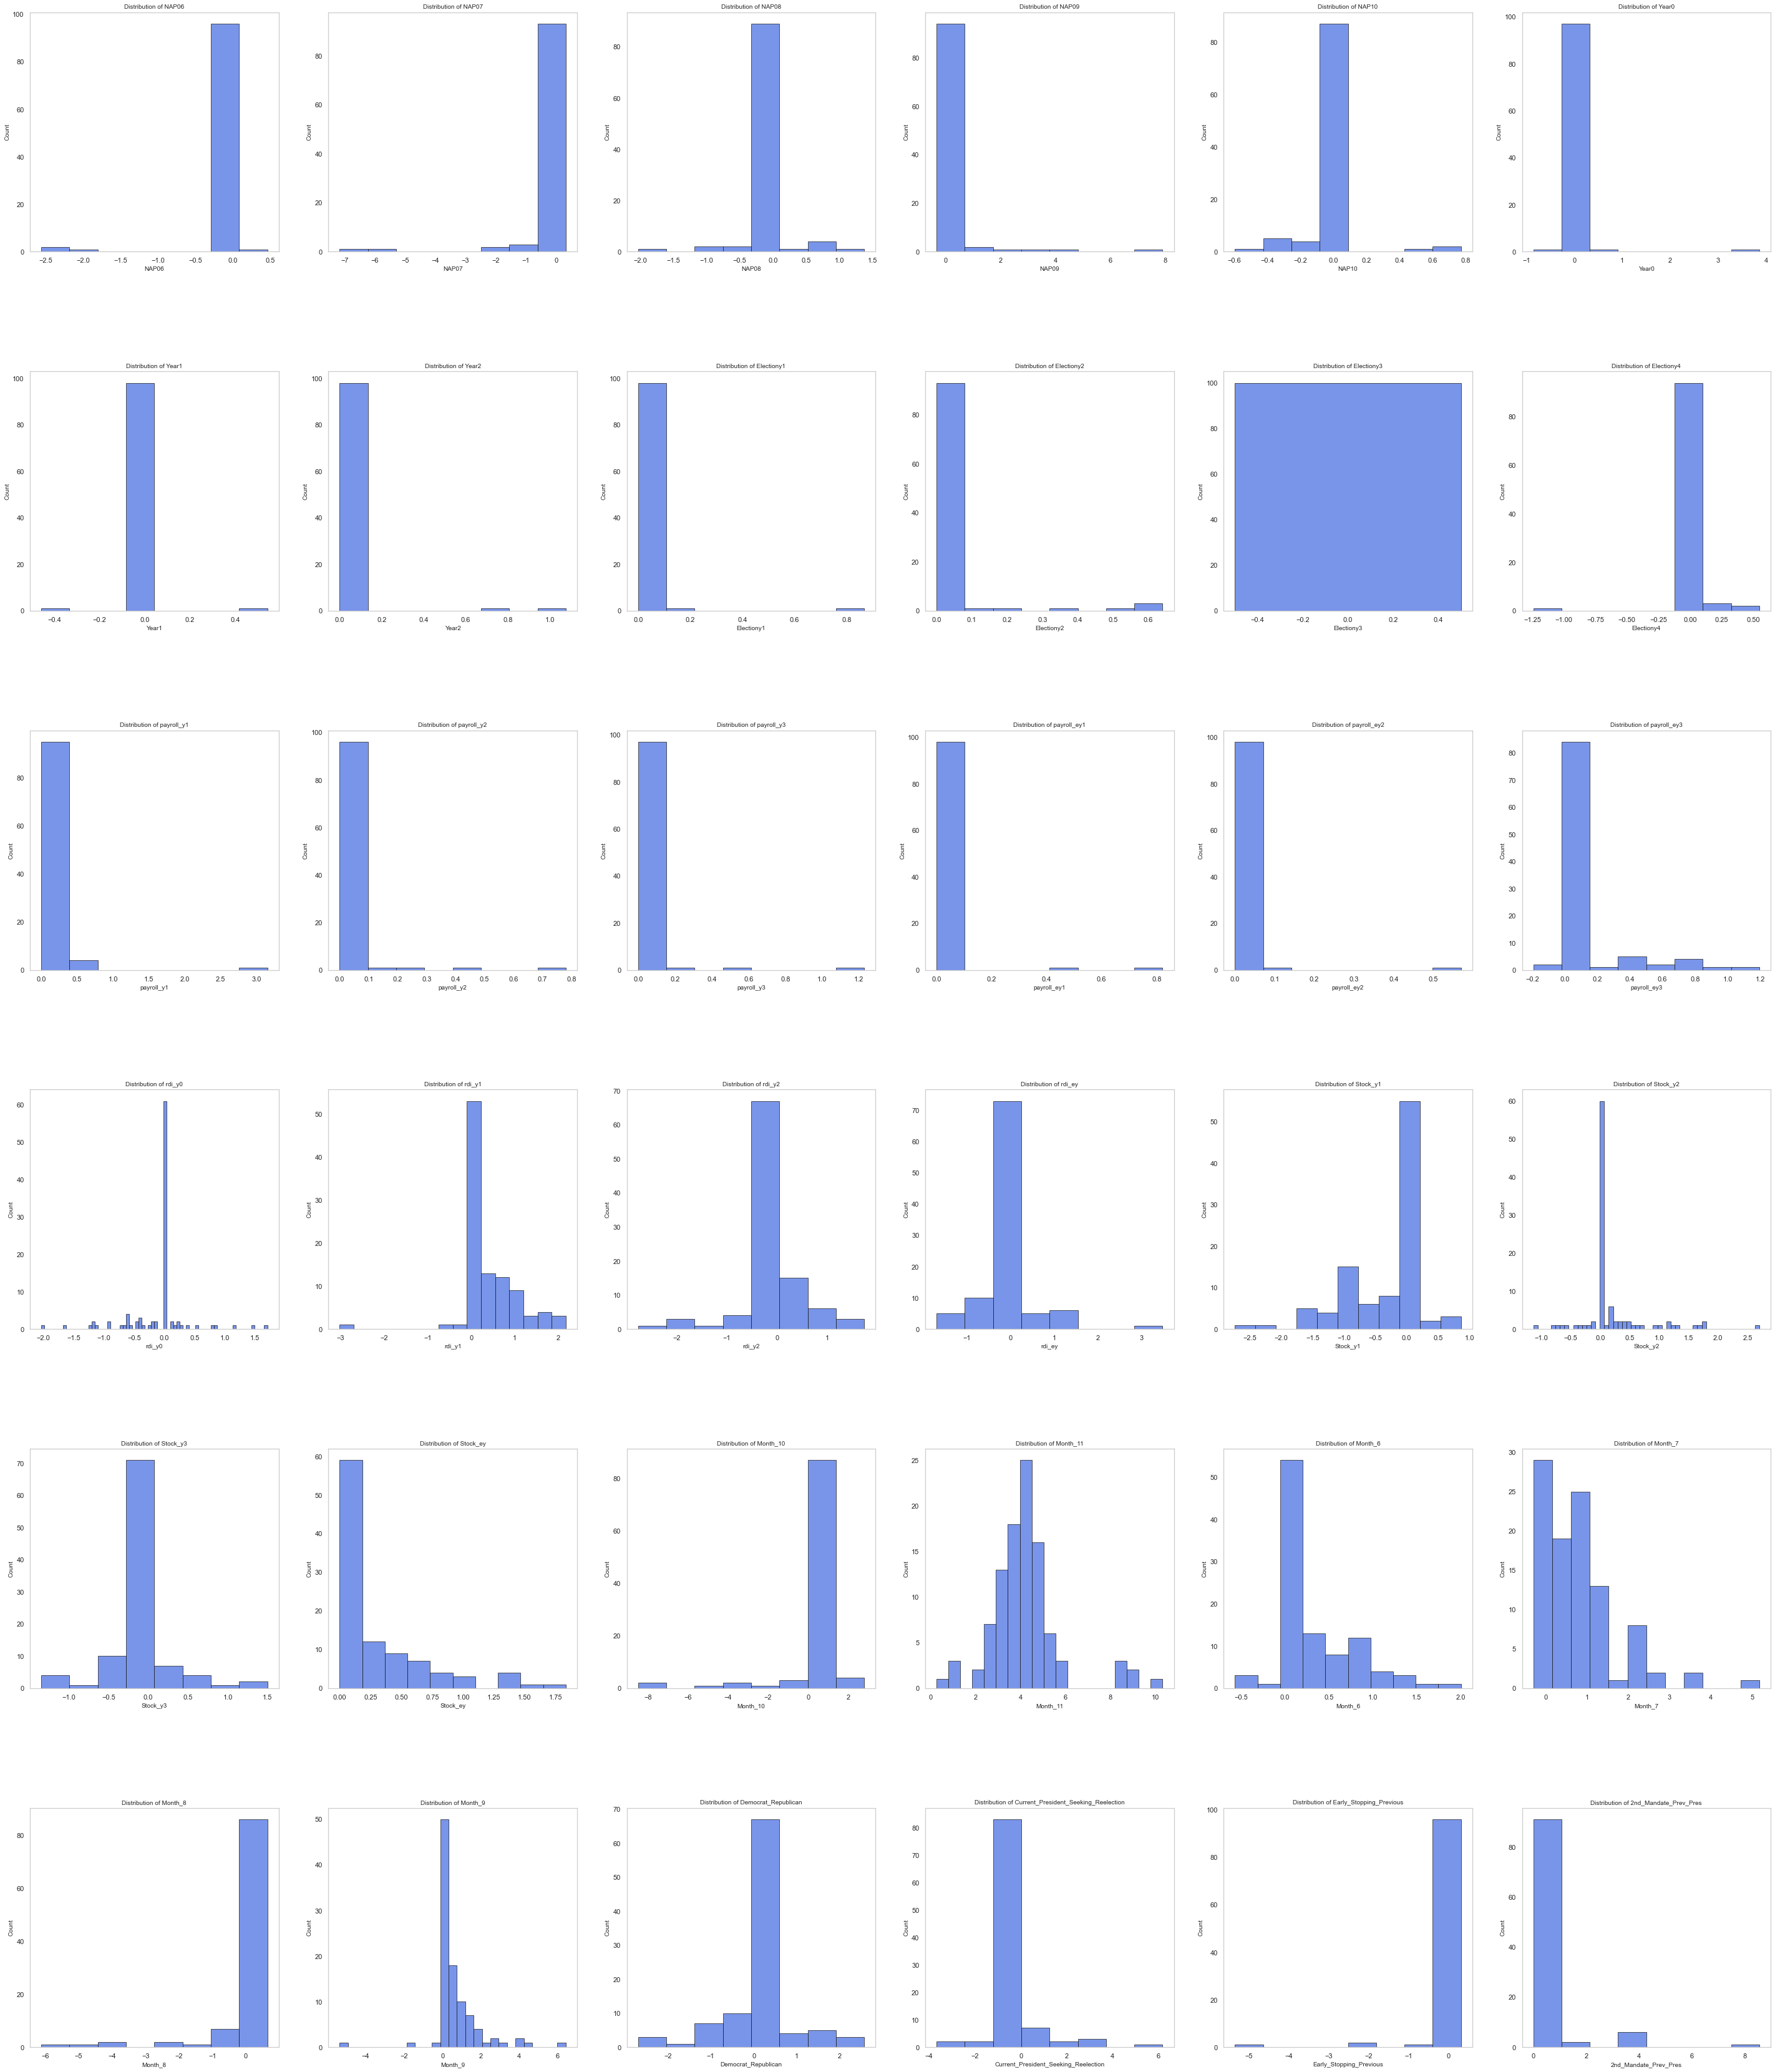

In [65]:
# Plotting histograms from bootstrapped LassoCV feature importance using 
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(50, 60), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
fontsize = 10

variables = lst

# plot histograms
for i, variable in enumerate(variables):
    axs[i].hist(coefs[variable], alpha=0.7, color='royalblue', bins='auto', density=False, histtype = 'bar', edgecolor='k')
    axs[i].set_title("Distribution of " + variable, fontsize=fontsize)
    axs[i].set_xlabel(variable, fontsize=fontsize)
    axs[i].set_ylabel('Count', fontsize=fontsize)
    